# Demo

A notebook to demonstrate some of the usage of `kookaburra`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import kookaburra as kb

%matplotlib inline

## Simulate some data

In [15]:
# Simulation parameters
pulse_injection_parameters = dict(
    C0=0.6, C1=0.1, beta=1e-3, toa=0.005,  # Parameters for the shapelets
    B0=0,  # Parameters for the polynomial base-flux
)

# Instantiate a flux model: a sum of the shaplet and polynomial flux classes
flux_model = kb.flux.ShapeletFlux(2) + kb.flux.PolynomialFlux(1)

# Generate fake data using the instantiated flux model and injection parameters
N = 1000
time = np.linspace(0, 2 * pulse_injection_parameters["toa"], N)
flux = flux_model(time, **pulse_injection_parameters)

# Add Gaussian noise
sigma = 1e-1
flux += np.random.normal(0, sigma, N)

# Write the data to a text file
df = pd.DataFrame(dict(time=time, flux=flux, pulse_number=0))
filename = "fake_data.txt"
df.to_csv(filename, index=False)

## Plot the data

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Flux')]

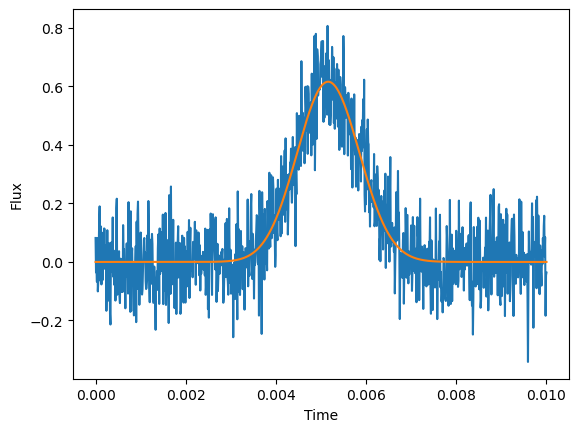

In [16]:
fig, ax = plt.subplots()
ax.plot(time, flux)
ax.plot(time, flux_model(time, **pulse_injection_parameters))
ax.set(xlabel="Time", ylabel="Flux")

## Fit the data

In [17]:
flux_model.parameter_keys

['beta', 'toa', 'C0', 'C1', 'B0']

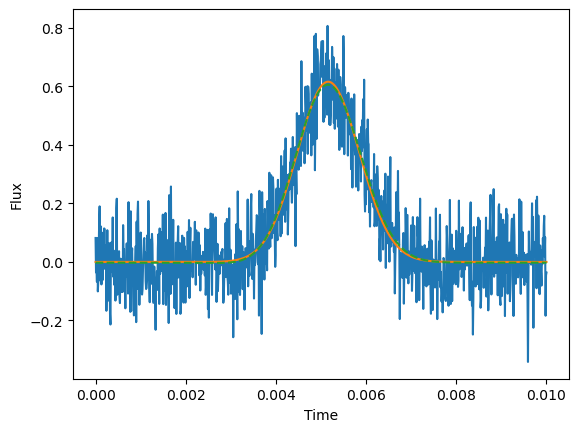

In [20]:
from scipy.optimize import curve_fit

# To fit the data, we utilise the args
# Note - the order of p0 is implicitly defined by flux_model.parameter_keys
p0 = [
    1e-3,  # Initial guess for beta
    np.mean(time), # Initial guess for t0
    np.max(flux),  # Initial guess for C0
    np.max(flux),  # Initial guess for C1
    np.mean(flux)  # Initial guess for B0
]
popt, pcov = curve_fit(flux_model, time, flux, p0=p0)

fig, ax = plt.subplots()
ax.plot(time, flux)
ax.plot(time, flux_model(time, **pulse_injection_parameters))
ax.plot(time, flux_model(time, *popt), "--")
ax.set(xlabel="Time", ylabel="Flux")
plt.show()